### Main File for our testing for the project


In [7]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
import tensorflow as tf

# Testing code from another strategy

In [ ]:
# Import the dataset
img_height = 288
img_width = 432
batch_size = 10
data_dir = "../data/Images_Original"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    shuffle = True,
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    shuffle = True,
    batch_size=batch_size)


# Recent Strategy

# Let's add some functions to generate the full spectrogram and generate segments of the spectrogram so we have more data to train on.

In [8]:
def get_melspectrogram(wav_file_path, length=30, duration_of_segments=5 ):
    """
    Get mel spectrogram for a given wav file and divide it into parts.

    :param wav_file_path: Path to the source wav file
    :param length: length in seconds of the source audio file. Defaults to 30.
    :param duration_of_segments: duration of segments in seconds. number of segments = length/duration_of_segments. Defaults to 5.
    :return: Mel spectrogram of the source wav file. Segments will be saved to a file and it's path will be printed.
    """
    y, sr = librosa.load(wav_file_path, sr=None, duration=length)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # Determine the number of samples in the duration of segments
    samples_per_segment = sr * duration_of_segments

    # Number of segments
    num_segments=int(length/duration_of_segments)

    # Loop through the audio signal and extract the segments
    for i in range(num_segments):
        # Get the start and end indices of the segment
        start = i * samples_per_segment
        end = start + samples_per_segment

        # Extract the segment from the audio signal
        segment = y[start:end]

        # Compute the mel spectrogram of the segment
        mel_spec_segment = librosa.feature.melspectrogram(y=segment, sr=sr)

        # sample name
        sample_name = wav_file_path.replace("../data/genres_original/","").replace(".wav","")

        # path to save samples to
        sample_name = f'{sample_name.split("/")[0]}/npy/{sample_name.split("/")[1]}'

        save_path = f'../data/mel_spec_samples/{sample_name}_{i}.npy'
        # Save the mel spectrogram to a file
        np.save(save_path, mel_spec_segment)
        print(f'Saved segment /{sample_name}_{i}.npy')

    return melspectrogram


def plot_melspectrogram(melspectrogram):
    """
    Plot mel spectrogram using pyplot to visualize the data. Works for both full spectrogram and segments.

    :param melspectrogram: np.array of mel spectrogram generated using librosa.feature.melspectrogram()
    :return: void
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()


In [20]:
# test segmentation of audio file
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for test_genre in genres:

    # Filename to test functions
    for i in range(0,10):
        sample_number = ""
        if i < 10:
            sample_number = f'0{i}'
        else:
            sample_number = f'{i}'
        test_filename = f'../data/genres_original/{test_genre}/{test_genre}.000{sample_number}.wav'

        # Test the main get_melspectrogram function to generate the full audio spectrogram of a given file, and save segments of itself to files
        mel_spectrogram = get_melspectrogram(test_filename, length=30, duration_of_segments=5)





Saved segment /blues/npy/blues.00000_0.npy
Saved segment /blues/npy/blues.00000_1.npy
Saved segment /blues/npy/blues.00000_2.npy
Saved segment /blues/npy/blues.00000_3.npy
Saved segment /blues/npy/blues.00000_4.npy
Saved segment /blues/npy/blues.00000_5.npy
Saved segment /blues/npy/blues.00001_0.npy
Saved segment /blues/npy/blues.00001_1.npy
Saved segment /blues/npy/blues.00001_2.npy
Saved segment /blues/npy/blues.00001_3.npy
Saved segment /blues/npy/blues.00001_4.npy
Saved segment /blues/npy/blues.00001_5.npy
Saved segment /blues/npy/blues.00002_0.npy
Saved segment /blues/npy/blues.00002_1.npy
Saved segment /blues/npy/blues.00002_2.npy
Saved segment /blues/npy/blues.00002_3.npy
Saved segment /blues/npy/blues.00002_4.npy
Saved segment /blues/npy/blues.00002_5.npy
Saved segment /blues/npy/blues.00003_0.npy
Saved segment /blues/npy/blues.00003_1.npy
Saved segment /blues/npy/blues.00003_2.npy
Saved segment /blues/npy/blues.00003_3.npy
Saved segment /blues/npy/blues.00003_4.npy
Saved segme

# Run this if you are getting 'Directory Not Found' errors

In [28]:
# Run this if you are getting 'Directory Not Found' errors

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for genre in genres:
    os.makedirs(f'../data/mel_spec_samples/{genre}', exist_ok=True)
    os.makedirs(f'../data/mel_spec_samples/{genre}/npy', exist_ok=True)
    os.makedirs(f'../data/mel_spec_samples/{genre}/png', exist_ok=True)

print('done')

done


# Now let's generate the images from the mel spectrogram segments we generated above.

In [26]:
# Function to generate images from mel spectrograms for a given genre
def generate_images_for_genre(genre, num_samples=6):
    """
    Generate images from mel spectrogram segments for a given genre and save them to the same directory as the segments.

    :param genre: string of genre to generate images for
    :param num_samples: number of samples. Defaults to 6.
    :return: False if error, True if successful
    """
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    if genre not in genres:
        print(f'Genre \"{genre}\" not in list of genres')
        return False
    for j in range(0,100):
        sample_number = ""
        if j < 10:
            sample_number = f'0{j}'
        else:
            sample_number = f'{j}'

        for i in range(num_samples):
            mel_segment = np.load(f'../data/mel_spec_samples/{genre}/npy/{genre}.000{sample_number}_{i}.npy')
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(librosa.power_to_db(mel_segment, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'{genre}.00000_{i}.npy')
            plt.tight_layout()
            save_name = f'../data/mel_spec_samples/{genre}/png/{genre}.000{sample_number}_{i}.png'
            plt.savefig(save_name, bbox_inches='tight', pad_inches=0)
            plt.close()
            print(f'Saved image: {save_name}')

    return True

### Test that bad boy

#### This will take a minute or two to run

Saved image: ../data/mel_spec_samples/classical/png/classical.00000_0.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00000_1.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00000_2.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00000_3.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00000_4.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00001_0.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00001_1.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00001_2.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00001_3.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00001_4.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00002_0.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00002_1.png
Saved image: ../data/mel_spec_samples/classical/png/classical.00002_2.png
Saved image: ../data/mel_spec_samples/

KeyboardInterrupt: 

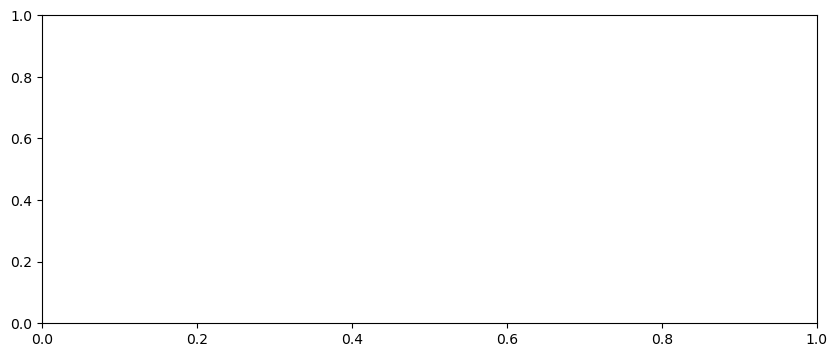

In [19]:
generate_images_for_genre('classical', num_samples=5)

## Now let's generate images for all genre samples

#### This will take a while to run

In [25]:
# test segmentation of audio file
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for test_genre in genres:

    # Filename to test functions on
    test_filename = f'../data/genres_original/{test_genre}/{test_genre}.00000.wav'

    # Test the main get_melspectrogram function to generate the full audio spectrogram of a given file, and save segments of itself to files
    mel_spectrogram = get_melspectrogram(test_filename, length=30, duration_of_segments=5)

    # Generate images for all the genre segments
    generate_images_for_genre(test_genre, num_samples=6)


Saved segment /blues/npy/blues.00000_0.npy
Saved segment /blues/npy/blues.00000_1.npy
Saved segment /blues/npy/blues.00000_2.npy
Saved segment /blues/npy/blues.00000_3.npy
Saved segment /blues/npy/blues.00000_4.npy
Saved segment /blues/npy/blues.00000_5.npy
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_0.png
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_1.png
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_2.png
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_3.png
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_4.png
Saved image: ../data/mel_spec_samples/blues/png/blues.00000_5.png
Saved segment /classical/npy/classical.00000_0.npy
Saved segment /classical/npy/classical.00000_1.npy
Saved segment /classical/npy/classical.00000_2.npy
Saved segment /classical/npy/classical.00000_3.npy
Saved segment /classical/npy/classical.00000_4.npy
Saved segment /classical/npy/classical.00000_5.npy
Saved image: ../data/mel_spec_samples/cl

# Normalize the Data so that it has 0 mean and unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
# normalize the mel spectrogram values to have zero mean and unit variance
def normalize_melspectrogram(mel_spec_path):
    mel_spec = np.load(mel_spec_path)

    # Reshape the data to have a channel dimension of 1
    mel_spec = mel_spec.reshape(mel_spec.shape[0], mel_spec.shape[1], 1)

    scaler = StandardScaler()
    mel_spec_normalized = scaler.fit_transform(mel_spec.reshape(mel_spec.shape[0], -1))
    mel_spec_normalized = mel_spec_normalized.reshape(mel_spec.shape)
    return mel_spec_normalized

# plot normalized mel spectrogram

In [ ]:
# Test that each genre is generating spectrograms correctly (TEST CODE)

In [ ]:
# load saved spectrogram from .npy files and plot them in subplots
test_filename = f'../data/mel_spec_samples/blues/blues.00000_0.npy'
var = np.load(test_filename)

plot_melspectrogram(var)

# Generate normalized mel spectrogram
mel_spectrograms_normalized = normalize_melspectrogram('../data/mel_spec_samples/blues/blues.00000_0.npy')

print(f'shape: {mel_spectrograms_normalized.shape}')
# Plot the first mel spectrogram in the normalized data as a line plot
plt.plot(mel_spectrograms_normalized[0].flatten())
plt.title('Normalized Mel Spectrogram')
plt.xlabel('Mel spectrogram bin')
plt.ylabel('Normalized value')
plt.show()

# Plot the first mel spectrogram in the normalized data as a line plot
plt.plot(var.flatten())
plt.title('Original Mel Spectrogram')
plt.xlabel('Mel spectrogram bin')
plt.ylabel('Normalized value')
plt.show()



